<a href="https://colab.research.google.com/github/Pyben-II/Aidigo-logistic/blob/main/Ruben/1_%D0%98%D0%B7%D0%B2%D0%BB%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Извлечение характеристик аудиофайлов

### def libr_spectr извлечение и печать характеристик

In [ ]:
def libr_spectr(audio_files):
    for audio_file in audio_files:
        y, sr = librosa.load(audio_file)                                # Извлечение основных аудио-функций
        global n_fft, hop_length
        n_fft = librosa.stft(y).shape[0]                                # от "number of samples used in each short-time Fourier transform:количества выборок, используемых в каждом кратковременном преобразовании Фурье») из формы STFT
        hop_length = librosa.stft(y, hop_length=512).shape[1]           # Извлечение hop_length, используя определенное значение 512\256
        # Извлечение основных характеристик аудио
        global tempo, chroma_cq, mfcc, spectrogram, mel, rms, tonnetz
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr)              # темп аудио
        chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)              # хроматические признаки
        mfcc = librosa.feature.mfcc(y=y, sr=sr) # MFCC
        # Извлечение дополнительных характеристик аудио
        spectrogram = np.abs(librosa.stft(y))                           # Спектрограмма
        mel = librosa.feature.melspectrogram(y=y, sr=sr)                # Мел-спектрограмма
        rms = librosa.feature.rms(y=y)                                  # RMS энергия
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)                   # Tonnetz

        return n_fft, hop_length, tempo, chroma_cq, mfcc, spectrogram, mel, rms, tonnetz

def print_libr_spectr(audio_files):
    for audio_file in audio_files:
        n_fft, hop_length, tempo, chroma_cq, mfcc, spectrogram, mel, rms, tonnetz = libr_spectr([audio_file])
        print(f"Audio File: {audio_file}")
        print("Длина сигнала 'у':", len(librosa.load(audio_file)[0]))   # длина сигнала
        print("n_fft:", n_fft)                                          # количества выборок, используемых в каждом кратковременном преобразовании Фурье
        print("hop_length:", hop_length)
        print("Tempo:", tempo)                                          # темп аудио
        print("Chroma features shape:", chroma_cq.shape)                # хроматические признаки
        print("MFCC shape:", mfcc.shape)                                # коэффициенты мел-частотных кепстральных коэффициентов (MFCC)
        print("Spectrogram shape:", spectrogram.shape)                  # спектрограмма
        print("Mel spectrogram shape:", mel.shape)                      # мел-спектрограмма
        print("RMS shape:", rms.shape)                                  # RMS энергия
        print("Tonnetz shape:", tonnetz.shape)                          # Tonnetz
        print()

### def display_libr_spectr Визуализация характеристик

In [ ]:
def display_libr_spectr():
  # Создание временной оси для RMS энергии
  time = librosa.times_like(rms)

  # Вывод результатов и визуализация
  plt.figure(figsize=(14, 10))

  plt.subplot(2, 3, 1)
  librosa.display.specshow(chroma_cq, y_axis='chroma')
  plt.colorbar()
  plt.title('Chroma Features')

  plt.subplot(2, 3, 2)
  librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time')
  plt.title('Spectrogram')

  plt.subplot(2, 3, 3)
  librosa.display.specshow(librosa.amplitude_to_db(mel, ref=np.max), y_axis='mel', x_axis='time')
  plt.title('Mel Spectrogram')

  # Добавление графика временной зависимости RMS энергии
  plt.subplot(2, 3, 4)
  plt.plot(time, rms[0], color='b')
  plt.xlabel('Time (s)')
  plt.ylabel('RMS Energy')
  plt.title('RMS Energy over Time')

  plt.subplot(2, 3, 5)
  librosa.display.specshow(tonnetz, y_axis='tonnetz')
  plt.colorbar()
  plt.title('Tonnetz Features')

  plt.tight_layout()
  plt.show()

## Характеристики аудио (примеры)

In [ ]:
# Список аудиофайлов
audio_files = ["/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Ларису Ивановну хачу.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Это была комедия.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/smile/Смех - Джентельмены удачи.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/woman/Microphone_ARU_OFF.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/woman/audio1_segment_32.mp3"]
# Вызов функции для вывода результатов
print_libr_spectr(audio_files)

Audio File: /content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Ларису Ивановну хачу.wav
Длина сигнала 'у': 104256
n_fft: 1025
hop_length: 204
Tempo: 172.265625
Chroma features shape: (12, 204)
MFCC shape: (20, 204)
Spectrogram shape: (1025, 204)
Mel spectrogram shape: (128, 204)
RMS shape: (1, 204)
Tonnetz shape: (6, 204)

Audio File: /content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Это была комедия.wav
Длина сигнала 'у': 161280
n_fft: 1025
hop_length: 316
Tempo: 129.19921875
Chroma features shape: (12, 316)
MFCC shape: (20, 316)
Spectrogram shape: (1025, 316)
Mel spectrogram shape: (128, 316)
RMS shape: (1, 316)
Tonnetz shape: (6, 316)

Audio File: /content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/smile/Смех - Джентельмены удачи.wav
Длина сигнала 'у': 170496
n_fft: 1025
hop_length: 334
Tempo: 129.19921875
Chroma features shape: (12, 334)
MFCC shape: (20, 334)
Spectrogram shape: (1025, 334)
Mel spectrogram shape: (128, 334)
RMS

## Визуализация характеристик

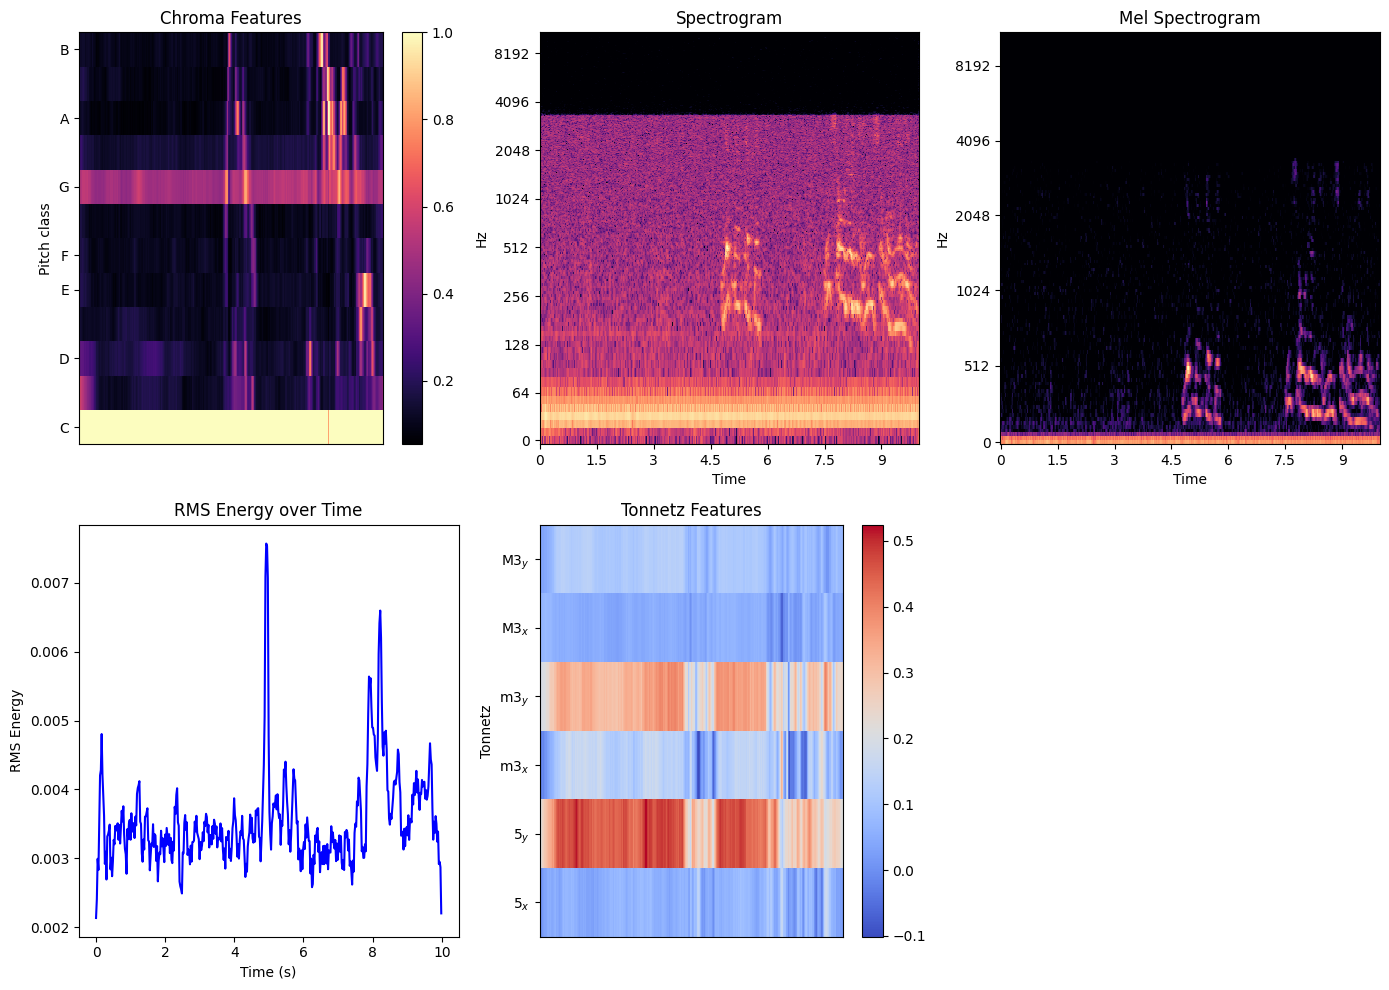

In [ ]:
# Функция визуализации характеристик
display_libr_spectr()

# 1-Классификация аудиофайлов на категории (SVM)

## подготовка X_train и Y_train

In [ ]:
# Загрузка и извлечение основных аудио-функций
audio_files = ["/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Ларису Ивановну хачу.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Это была комедия.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/smile/Смех - Джентельмены удачи.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/woman/Microphone_ARU_OFF.wav",
               "/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/woman/audio1_segment_32.mp3"]
X_train = []
Y_train = []

for audio_file in audio_files:
    y, sr = librosa.load(audio_file)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr), axis=1)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    rms = np.mean(librosa.feature.rms(y=y), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)

    spectrogram = np.mean(np.abs(librosa.stft(y)), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)

    features = np.concatenate([tempo.reshape(1), chroma_cq, mfcc, rms, tonnetz, spectrogram, mel])
    X_train.append(features)

    # Присвоение меток классов в зависимости от типа аудиофайла (пример)
    if "Короткие фразы/wav/smile" in audio_file:
        Y_train.append("smile speech")
    elif "Короткие фразы/wav/woman" in audio_file:
        Y_train.append("female speech")
    elif "Короткие фразы/wav/men" in audio_file:
        Y_train.append("male speech")
    else:
        Y_train.append("other sounds")

X_train = np.array(X_train)

## обучение модели SVM и предсказание

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающий и тестовый наборы
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# Масштабирование данных
# scaler = MinMax Scaling ()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Обучение модели SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Предсказание меток классов для тестового набора
y_pred = svm_model.predict(x_val)

# Оценка точности модели
accuracy = svm_model.score(x_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [ ]:
# print(x_train)
print("Длина x_train", len(x_train))
print("Длина y_train", len(y_train))
print("y_train", y_train)

print()
print("Длина x_val", len(x_val))
# print(x_test)
print("Длина y_val", len(y_val))
print("y_val", y_val)

Длина x_train 3
Длина y_train 3
y_train ['smile speech', 'male speech', 'female speech']

Длина x_val 2
Длина y_val 2
y_val ['male speech', 'female speech']


In [ ]:
print(len(y_pred))
print(y_pred[1])

2
female speech


## подготовка X_test и Y_test

In [ ]:
# Загрузка и извлечение основных аудио-функций
audio_files = ["/content/drive/MyDrive/Пансионат(аудио)/Dataset/Короткие фразы/wav/men/Это просто праздник.wav"]
X_test = []
Y_test = []

for audio_file in audio_files:
    y, sr = librosa.load(audio_file)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr), axis=1)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    rms = np.mean(librosa.feature.rms(y=y), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)

    spectrogram = np.mean(np.abs(librosa.stft(y)), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)

    features = np.concatenate([tempo.reshape(1), chroma_cq, mfcc, rms, tonnetz, spectrogram, mel])
    X_test.append(features)

    # Присвоение меток классов в зависимости от типа аудиофайла (пример)
    if "Короткие фразы/wav/smile" in audio_file:
        Y_test.append("smile speech")
    elif "Короткие фразы/wav/woman" in audio_file:
        Y_test.append("female speech")
    elif "Короткие фразы/wav/men" in audio_file:
        Y_test.append("male speech")
    else:
        Y_test.append("other sounds")

X_test = np.array(X_test)

In [ ]:
print("X_test.shape:", X_test.shape)
print("Y_test:", Y_test)

X_test.shape: (1, 1193)
Y_test: ['male speech']


In [ ]:
# Предсказание меток классов для тестового набора
print("Y_test=", Y_test)
y_pred = svm_model.predict(X_test)
print("y_pred=", y_pred)

Y_test= ['male speech']
y_pred= ['smile speech']
